So far, we've been running all of our code linearly, i.e. we execute a file an we let Python do its job. Here we will be running code *interactively*. Each cell will contain some code, which we can execute by clicking on the cell and pressing Shift + Enter. Here is an example:

In [1]:
print("Hello, world!")

Hello, world!


As you can see, the code executed and the output is now in the notebook. One thing that's special about Jupyter is that our variables are persistent. I.e. we could create the block:

In [2]:
hello = "Hello, world!"

And then in a new block execute:

In [3]:
print(hello)

Hello, world!


You might have noticed the `In [ ]` to the side of the cells. The numbers inside indicate the order in which the code in the cells was executed. You should imagine this notebook as maintaining a hidden Python program, with all of our variables and functions, etc. executed in the order of the `In [ ]` blocks.

Now, lets analyze some data. To start off with, we will import the libraries which we will need.

In [4]:
import pandas as pd
import sklearn as sk
from sklearn import datasets as ds
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In our first example, we will analyze a dataset of Boston house prices, which comes packaged with the `sklearn` module.

In [5]:
boston = ds.load_boston()

When you run a cell in Jupyter, it will try to print out the value on the last line of the cell. So far, we've loaded the dataset into a variable `boston`. Lets investigate how this dataset is actually structured.

In [6]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

As we can see, this dataset is actually a `dict`, containing a few fields. We can get a list of those fields:

In [7]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

The `DESCR` key is particularly interesting, as it contains a string which describes the dataset. Lets check it out:

In [8]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

So as we can see, the `data` field contains the first 13 attributes, the `target` field contains the median value of a house, and the `feature_names` contains the names of the features. We could view these all individually.

In [9]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [10]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [11]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

However, this is very inconvenient. To address this issue, we will use the `DataFrame` class from the `pandas` module we imported.

In [13]:
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Much nicer. There are settings in Jupyter which allow us to force rendering more rows, but we will not go into these now. The important thing is that we can inspect our data. We might wish to query our data to filter some results. Pandas supports a few ways of doing this. One of them is the `query` function of DataFrames.

In [14]:
df.query("CRIM >= 20") # List all towns with average crime rate >= 20 per capita

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
378,23.6482,0.0,18.1,0.0,0.671,6.380,96.2,1.3861,24.0,666.0,20.2,396.90,23.69
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21
384,20.0849,0.0,18.1,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63
386,24.3938,0.0,18.1,0.0,0.700,4.652,100.0,1.4672,24.0,666.0,20.2,396.90,28.28
387,22.5971,0.0,18.1,0.0,0.700,5.000,89.5,1.5184,24.0,666.0,20.2,396.90,31.99
398,38.3518,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59
400,25.0461,0.0,18.1,0.0,0.693,5.987,100.0,1.5888,24.0,666.0,20.2,396.90,26.77
403,24.8017,0.0,18.1,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
404,41.5292,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38
405,67.9208,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98


The query function is quite intuitive to use and if your query looks like python code, it will probably get executed. 

Now, maybe we want to inspect our data, to see how each of the attributes relates to the median house price (the "target"). To do that we will use the `pyplot` submodule of the `matplotlib` module. Lets first plot the crime rate against the house price.

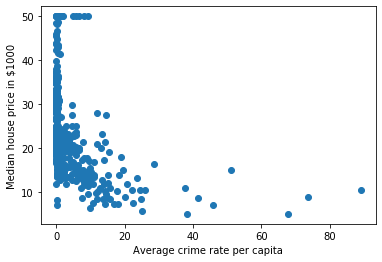

In [20]:
plt.scatter(df['CRIM'], boston['target'])
plt.xlabel('Average crime rate per capita')
plt.ylabel('Median house price in $1000')
plt.show()

As we might expect, the house price goes down as the crime rate increases. However, at the lower end, crime rate doesn't seem to be such a good predictor. We could do the same thing and plot each attribute against the house price. Or we could do it programatically.

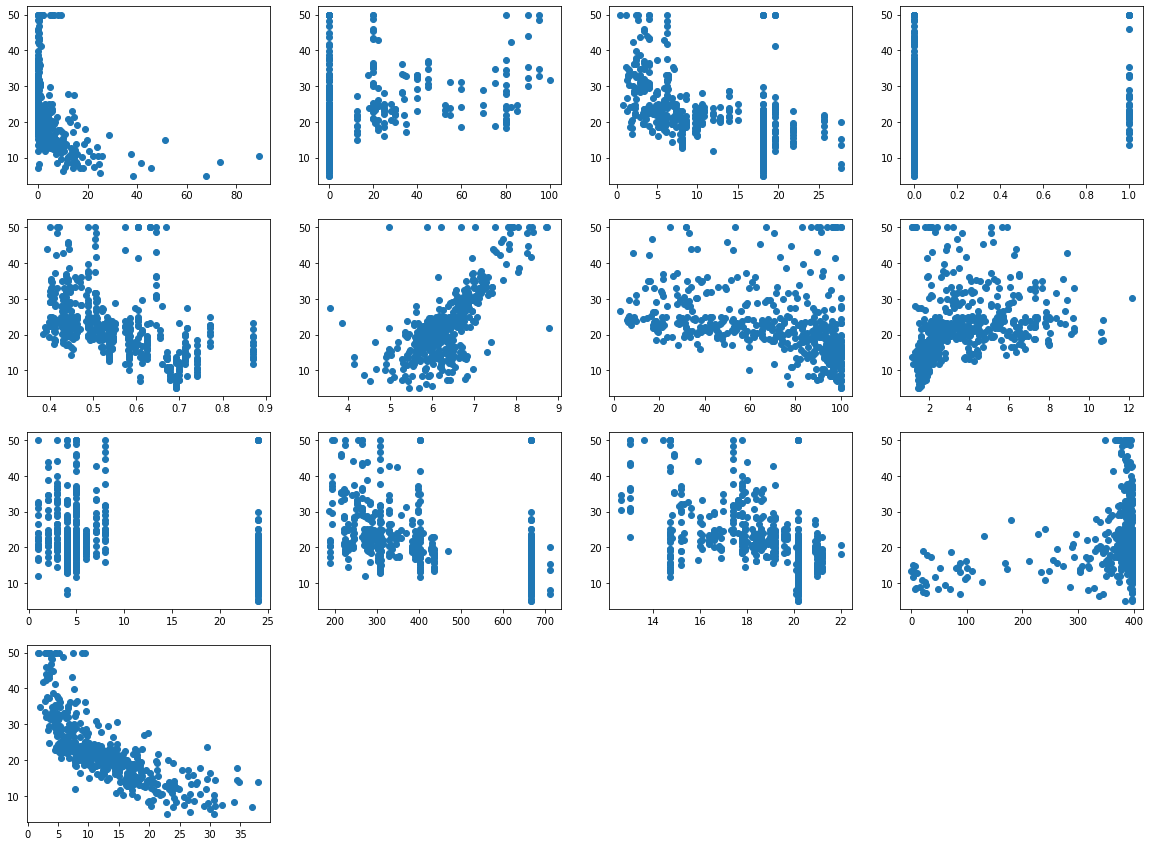

In [21]:
plt.figure(figsize=(20,15))
for i, column in enumerate(df):
    plt.subplot(4, 4, i+1)
    plt.scatter(df[column], boston['target'])

As we can see, some attributes seem more predictive than others. Let's focus on the `RM` attribute, which is the average number of rooms per dwelling.

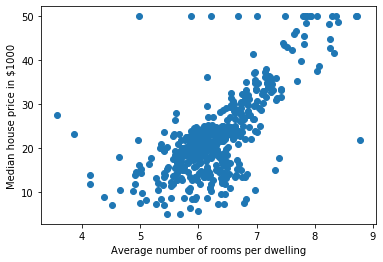

In [22]:
plt.scatter(df['RM'], boston['target'])
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median house price in $1000')
plt.show()

As we might expect, this also seems like a pretty good predictor of house price. But what if we wanted to model the correlation between the number of rooms in a dwelling and its expected price in that town? One simple model is called *Linear Regression*, and it essentially involves drawing a line through the data. The module `sklearn` provides us with such a model, which we will use in our program.

In [23]:
reg = LinearRegression().fit(df[['RM']], boston['target'])

Now the variable `reg` contains our model. It is *fit* on our data, meaning that it is the line which best fits our data (according to the linear regression interpretation). The red line is how our model fits the data. Essentially, it will always predict a house price that lies on the red line, given the number of rooms.

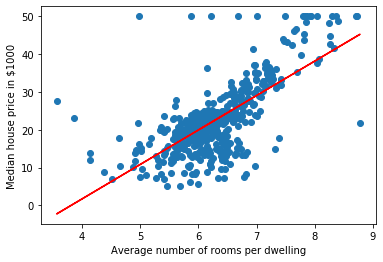

In [25]:
plt.scatter(df['RM'], boston['target'])
plt.plot(df['RM'], reg.predict(df[['RM']]), color='r')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median house price in $1000')
plt.show()

One way to evaluate how good our model fits the data is called an $R^2$ score, or a *coefficient of determination*. Essentially, it assigns a number between $-\infty$ and $1$ which indicates how well our model fits the data. The best possible score is $1$. We can check out the $R^2$ score of our model using the `score` function.

In [27]:
reg.score(df[['RM']], boston['target'])

0.4835254559913343

Not great, not terrible.

We can use the same technique to try to use *all* of our attributes to predict the house price. This would look like:

In [28]:
reg_full = LinearRegression().fit(df, boston['target'])

Now, to get an intuition of how well our model fits the data now, we will again plot the average number of rooms against the median price. This time, the actual data points are in blue, and the predictions of our model are in red.

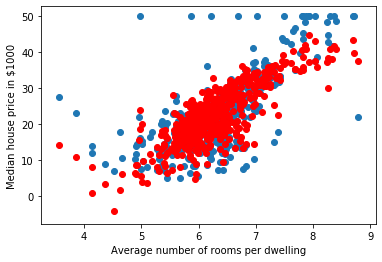

In [31]:
plt.scatter(df['RM'], boston['target'])
plt.scatter(df['RM'], reg_full.predict(df), color='r')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median house price in $1000')
plt.show()

This looks much better. In fact, we can try the score again:

In [32]:
reg_full.score(df, boston['target'])

0.7406426641094095

As we can see, this model is a lot better than the first one. As an exercise, you might want to try removing some of the attributes, and seeing which ones affect the score a lot, and which ones don't.

If we wanted to import our own dataset, we can do that as well. Pandas has functions like `read_csv` and `read_excel` which allow you to import your dataset from a `.csv` or `.xlsx` file and analyze it like any other DataFrame. What you would do is:

In [ ]:
my_df = pd.read_csv('my_dataset.csv')

Or

In [ ]:
my_df = pd.read_excel('my_dataset.xlsx')

The output here is omitted, but you can try googling "csv dataset" or "excel dataset" and try exploring some of them.

As an additional excercise, you might want to check out the other datasets included with `sklearn` and try exploring them like we did here. Try looking up methods other than Linear Regression as well.